In [821]:
# !pip install pandas matplotlib seaborn

In [822]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [823]:
df = pd.read_csv("Titanic-Dataset.csv")

In [824]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [826]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [827]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [828]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**A total of 177 missing values were recorded in the "Age" column. Since the mean and median are closely aligned, the median was used to impute the missing values. This method preserves the central tendency while reducing the influence of potential outliers.**
`

In [829]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [830]:
df.duplicated().sum()

np.int64(0)

In [831]:
df["Cabin"] = df["Cabin"].fillna("Unknown")

**The "Cabin" column contains 687 missing values. Since this feature may offer valuable insights, the missing entries are filled with "Unknown" instead of being dropped. This approach retains potentially useful information while clearly distinguishing unavailable data.**


In [832]:
df = df.loc[df["Embarked"].notna()]

In [833]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [834]:
df["Title"] = df["Name"].str.extract(r',\s*([^\.]*)\.')

In [835]:
df.drop(columns=["PassengerId","Name"],inplace=True)

In [836]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


----

**The "Embarked" column had 2 missing values. These rows were removed to maintain data quality, as the number of missing entries was minimal and dropping them does not significantly affect the dataset.**


**All missing values have been addressed, and no duplicate or null entries remain in the dataset. Since the data is now clean and preprocessed using logical imputation strategies, the next step is to proceed with Exploratory Data Analysis (EDA) through visualizations.**


---

# **EDA**

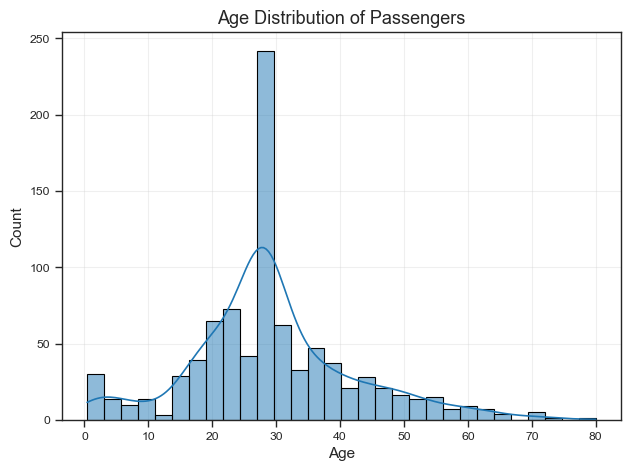

In [837]:
sns.set_style("ticks")
sns.histplot(data=df, x="Age", bins=30, kde=True, edgecolor="black")
plt.title("Age Distribution of Passengers", fontsize=13)
plt.xlabel("Age", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


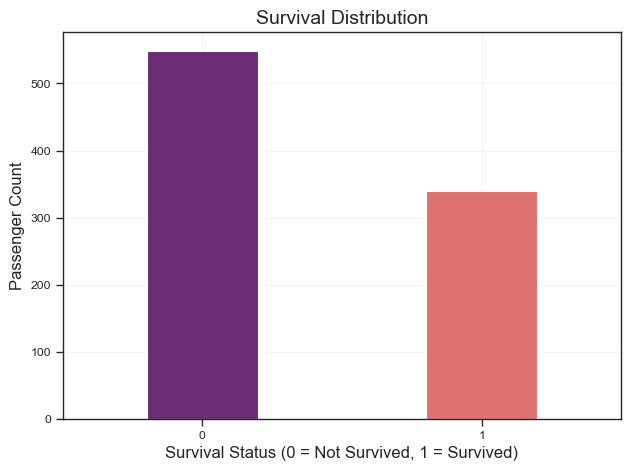

In [838]:
sns.countplot(data=df, x="Survived", width=0.4, palette="magma")
sns.set_style("ticks")
plt.grid(alpha=0.2)
plt.title("Survival Distribution", fontsize=14)
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)", fontsize=12)
plt.ylabel("Passenger Count", fontsize=12)
plt.tight_layout()
plt.show()


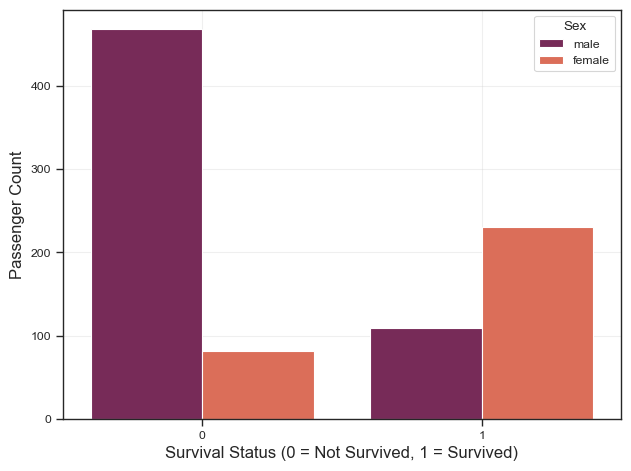

In [839]:
sns.countplot(data=df, x="Survived", hue="Sex", palette="rocket")
sns.set_style("ticks")
plt.grid(alpha=0.3)
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)", fontsize=12)
plt.ylabel("Passenger Count", fontsize=12)
plt.tight_layout()
plt.show()


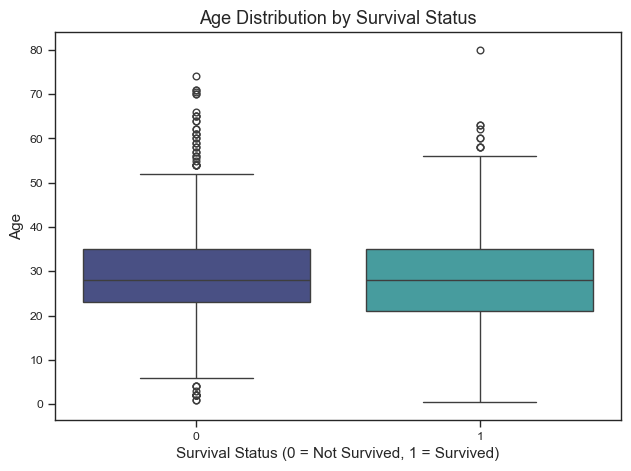

In [840]:
sns.boxplot(data=df, x="Survived", y="Age", palette="mako")
sns.set_style("ticks")
plt.title("Age Distribution by Survival Status", fontsize=13)
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)", fontsize=11)
plt.ylabel("Age", fontsize=11)
plt.tight_layout()
plt.show()


***“These outliers might be useful for prediction, so I won't remove them.”***

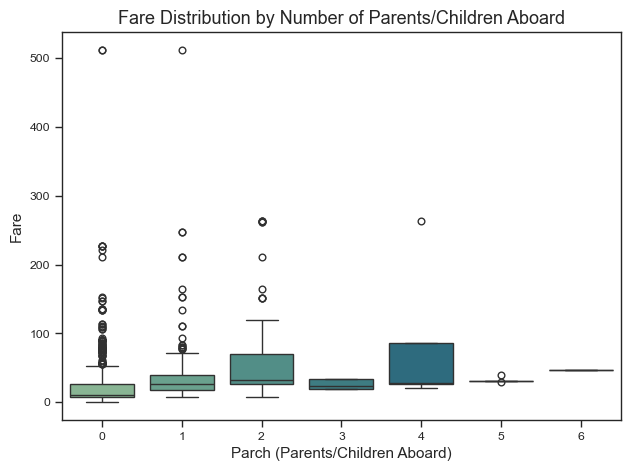

In [841]:
sns.boxplot(data=df, x="Parch", y="Fare", palette="crest")
sns.set_style("ticks")
plt.title("Fare Distribution by Number of Parents/Children Aboard", fontsize=13)
plt.xlabel("Parch (Parents/Children Aboard)", fontsize=11)
plt.ylabel("Fare", fontsize=11)
plt.tight_layout()
plt.show()


In [842]:
rare_titles = ['Rev', 'Dr', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 
               'Don', 'Jonkheer', 'Dona', 'the Countess', 'Mme', 'Ms', 'Mlle']

df['Title'] = df['Title'].replace(rare_titles, 'Rare')


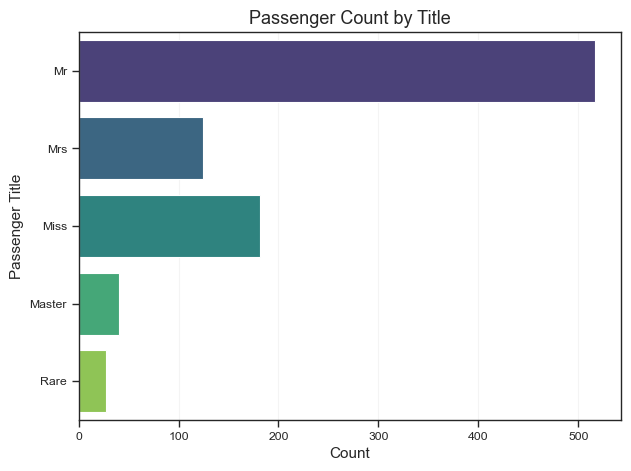

In [843]:
sns.countplot(data=df, y="Title", palette="viridis")
sns.set_style("ticks")
plt.title("Passenger Count by Title", fontsize=13)
plt.xlabel("Count", fontsize=11)
plt.ylabel("Passenger Title", fontsize=11)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()


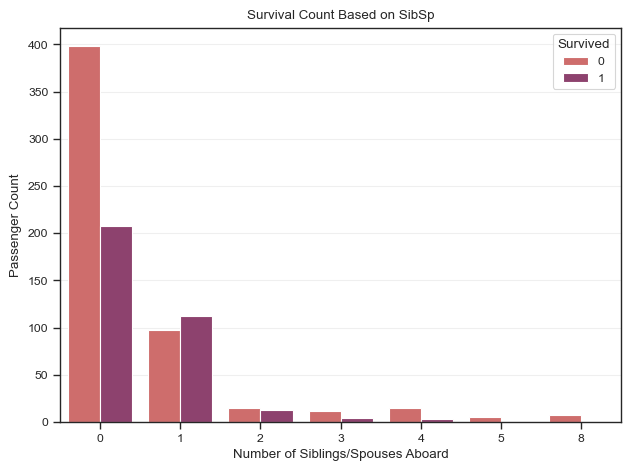

In [844]:
sns.countplot(data = df, x = "SibSp", hue="Survived",palette="flare")
plt.title("Survival Count Based on SibSp")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Passenger Count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()


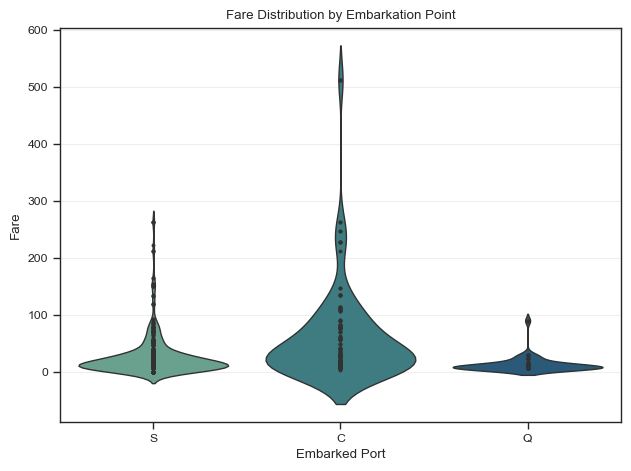

In [845]:
sns.violinplot(data=df, x="Embarked", y="Fare", inner="point", palette="crest")
sns.set_style("ticks")
plt.title("Fare Distribution by Embarkation Point")
plt.xlabel("Embarked Port")
plt.ylabel("Fare")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


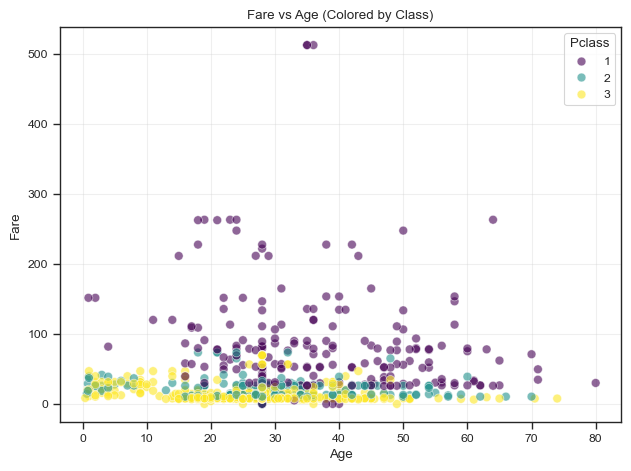

In [846]:
sns.set_style("ticks")
sns.scatterplot(data=df,x="Age",y="Fare",hue="Pclass",alpha=0.6,palette="viridis",s=40)
plt.title("Fare vs Age (Colored by Class)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

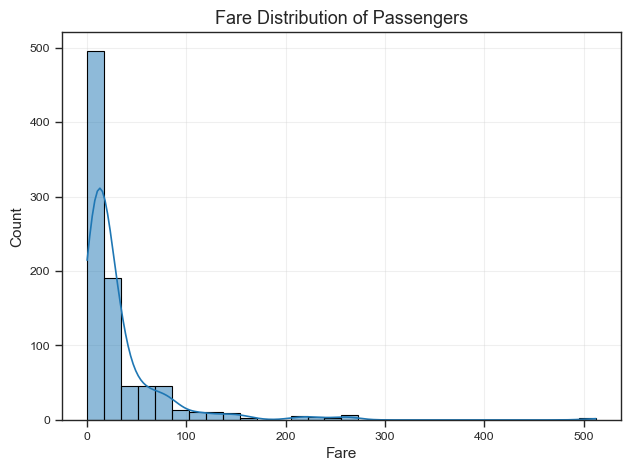

In [847]:
sns.set_style("ticks")
sns.histplot(data=df, x="Fare", bins=30, kde=True,edgecolor="black")
plt.title("Fare Distribution of Passengers", fontsize=13)
plt.xlabel("Fare", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


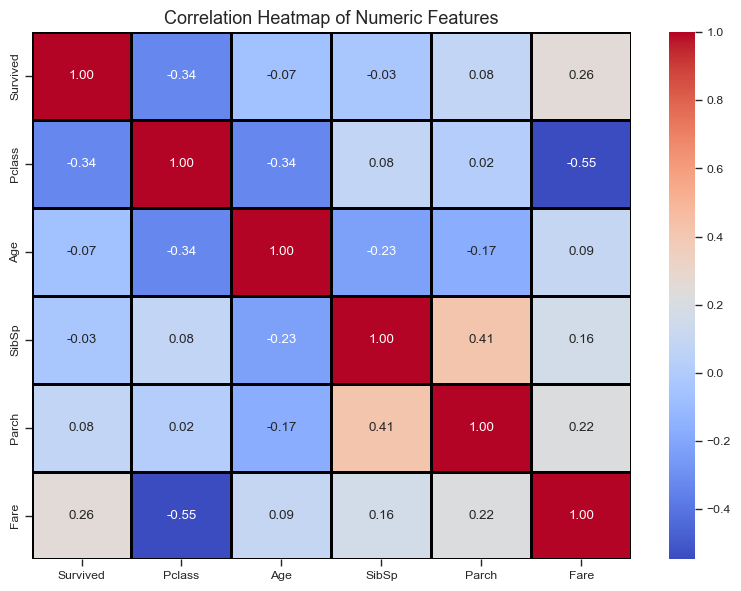

In [848]:
sns.set_style("ticks")
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",linewidths=1,linecolor="black",cmap="coolwarm",  robust=True,cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=13)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

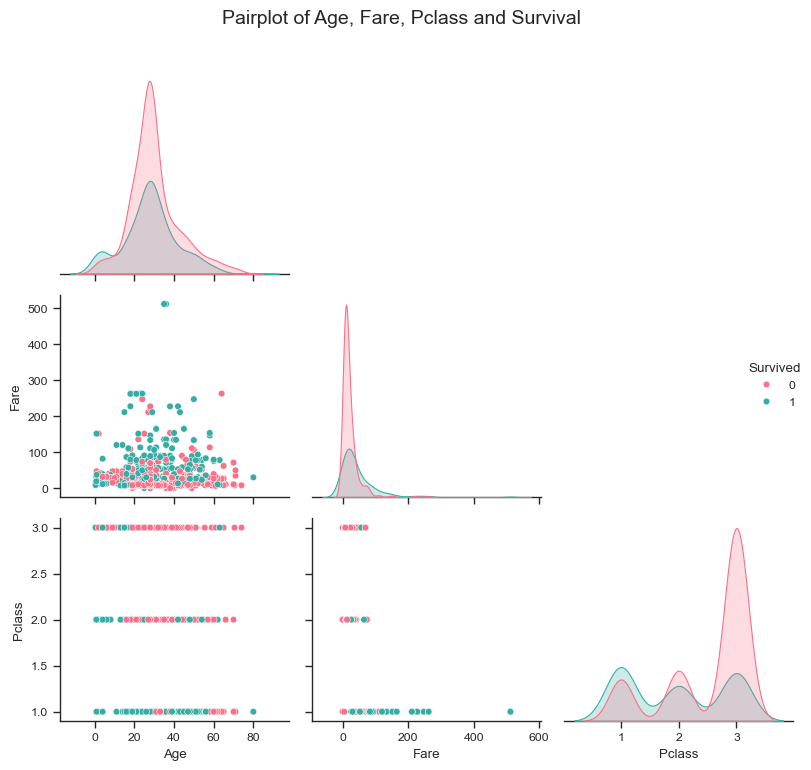

In [849]:
sns.set_style("ticks")
plt.figure(figsize=(10, 8))  
sns.pairplot( df[["Age", "Fare", "Pclass", "Survived"]], hue="Survived", palette="husl",diag_kind="kde",corner=True)
plt.suptitle("Pairplot of Age, Fare, Pclass and Survival", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### **🧠 Exploratory Data Analysis (EDA) Summary**

- **Survival Distribution: Clear distinction between survived and not-survived classes. Balanced enough for analysis.**

- **Gender-Based Survival: Female passengers had significantly higher survival rates compared to males.**

- **Fare Distribution: Fare is heavily right-skewed due to a few very high values. These outliers are retained because fare depends on factors like `Pclass`, `Embarked`, and `Parch`.**

- **Class Influence: Passengers in higher classes (especially 1st class) were more likely to survive and paid higher fares.**

- **Age Analysis: Age is fairly spread out. Children and younger passengers showed varying survival rates.**

- **Embarked Insight: Passengers from port 'C' paid higher median fares; 'Q' had the lowest.**

- **Title Feature: Extracted titles reveal meaningful patterns and can be used for feature engineering.**

- **Correlation Insights: Heatmap showed that `Fare`, `Pclass`, and `Sex` are influential features for survival.**

- **No Missing or Duplicate Values Left: All missing data handled logically and thoroughly.**

- **✅ The dataset is now clean, understood, and ready for the encoding and scaling phase.**


---

In [850]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [851]:
df["Cabin"] = df["Cabin"].str[0]

In [852]:
df["TicketPrefix"] = df["Ticket"].apply(lambda x: x.split()[0] if not x.isdigit() else "None")

In [853]:
top_prefixes = df["TicketPrefix"].value_counts().nlargest(5).index
df["TicketPrefix"] = df["TicketPrefix"].apply(lambda x: x if x in top_prefixes else "Other")

In [854]:
df["Cabin"] = df["Cabin"].fillna("U")

In [855]:
df.drop(columns="Ticket",axis=1,inplace=True)

In [856]:
df["Title"] = df["Title"].apply(lambda x: x if x in ["Mr","Mrs","Miss","Master"]else "None")

## **One Hot Encode**

In [857]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,TicketPrefix
0,0,3,male,22.0,1,0,7.2500,U,S,Mr,A/5
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,PC


In [858]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Cabin", "Embarked", "TicketPrefix","Title"], drop_first=True)

In [859]:
df_encoded =  df_encoded.astype(int)

## **Standard Scaling**

In [860]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ["Pclass","Age","SibSp","Fare"]

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [861]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,TicketPrefix_C.A.,TicketPrefix_None,TicketPrefix_Other,TicketPrefix_PC,TicketPrefix_STON/O,Title_Miss,Title_Mr,Title_Mrs,Title_None
0,0,0.825209,-0.562078,0.431350,0,-0.496733,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,-1.572211,0.670007,0.431350,0,0.791539,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.825209,-0.254057,-0.475199,0,-0.496733,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,1,-1.572211,0.438991,0.431350,0,0.429213,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,0,0.825209,0.438991,-0.475199,0,-0.476604,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.373501,-0.177052,-0.475199,0,-0.375957,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,1,-1.572211,-0.793094,-0.475199,0,-0.033760,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
888,0,0.825209,-0.100046,0.431350,2,-0.174665,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
889,1,-1.572211,-0.254057,-0.475199,0,-0.033760,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [862]:
X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

# **Model**

In [863]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [867]:
model = LogisticRegression(max_iter=1000)

In [868]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [869]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [870]:
y_pred = model.predict(X_test)

In [885]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred),"\n")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report: ",classification_report(y_test,y_pred))

Accuracy Score:  0.8231292517006803 

Confusion Matrix: 
 [[155  29]
 [ 23  87]]

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.84      0.86       184
           1       0.75      0.79      0.77       110

    accuracy                           0.82       294
   macro avg       0.81      0.82      0.81       294
weighted avg       0.83      0.82      0.82       294



## **Testing Accuracy**

In [ ]:
y_test_pred = model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_test_pred))
print(": ", confusion_matrix(y_test,y_test_pred))

Accuracy Score:  0.8231292517006803


## **Cross Validation**

In [890]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model,X,y,cv=10)
print("Cross Validation Score", cv_score)

Cross Validation Score [0.78651685 0.84269663 0.78651685 0.86516854 0.83146067 0.78651685
 0.80898876 0.82022472 0.86516854 0.84090909]


In [891]:
print("Cross Validation Score", cv_score.mean())

Cross Validation Score 0.8234167517875383


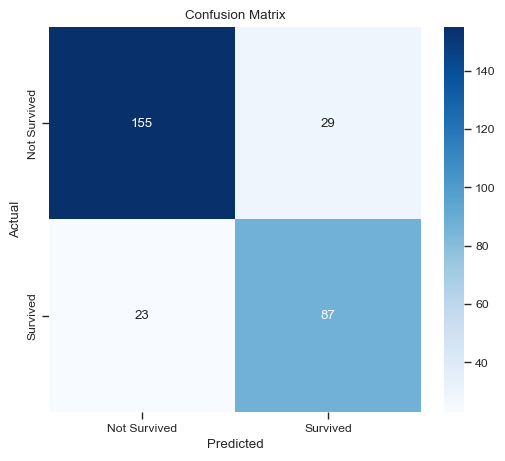

In [892]:


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


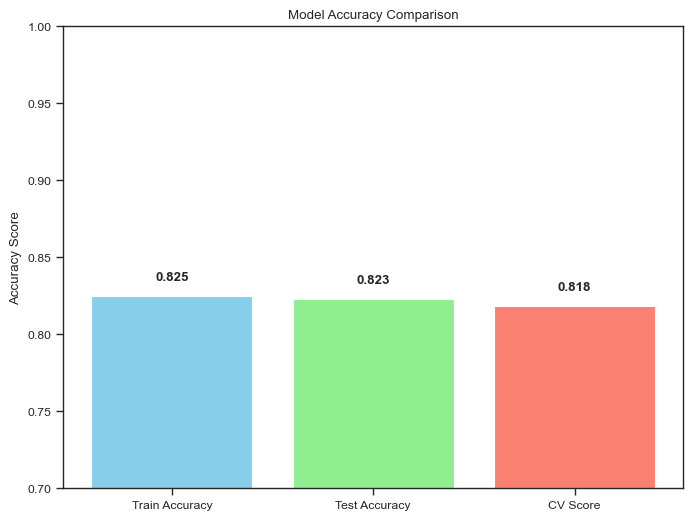

In [896]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

scores = [train_accuracy, test_accuracy, cv_score]
labels = ['Train Accuracy', 'Test Accuracy', 'CV Score']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', fontweight='bold')
plt.show()


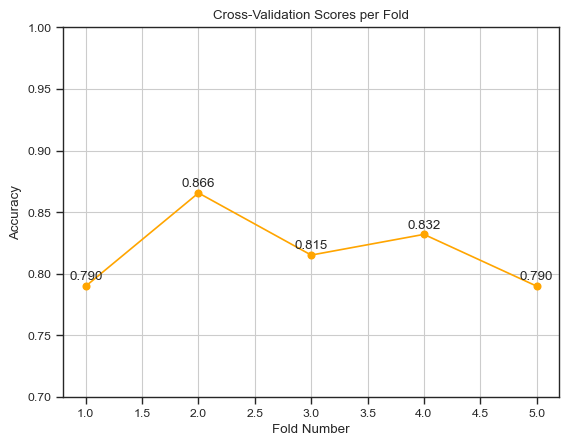

In [895]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='orange')
plt.title("Cross-Validation Scores per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
for i, score in enumerate(cv_scores):
    plt.text(i + 1, score + 0.005, f"{score:.3f}", ha='center')
plt.grid(True)
plt.show()
